In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##### Veri Kaggle'dan alınmıştır: https://www.kaggle.com/datasets/thedevastator/bank-term-deposit-predictions?resource=download

In [2]:
base_url = "C:/Users/M E L S A/Desktop/M E L S A/data_science/datasciencetemp/data/bank/"
train_url = base_url + "train.csv"
test_url = base_url + "test.csv"

In [3]:
train_df = pd.read_csv(train_url)

In [4]:
test_df = pd.read_csv(test_url)

###### age : Müşterinin yaşı 	
###### job : Müşterinin işi
###### marital :	Müşterinin medeni durumu (married, single, divorced)
###### education : Müşterinin eğitim düzeyi
###### default :	Müşterinin temerrüde düşmüş kredisi olup olmadığı
###### balance :	Müşterinin hesabındaki bakiye
###### housing loan : Müşterinin konut kredisi olup olmadığı	
###### contact :	Müşteriyle iletişim kurmak için kullanılan yöntem (örn. telefon, cep telefonu)
###### day :	Müşterilerle en son iletişime geçilen ayın günü
###### month	: Müşterilerle en son iletişime geçilen ay
###### duration : Kampanya süresince müşterilerle son temasın süresi (saniye cinsinden)	
###### campaign : Her müşteri için bu kampanya sırasında gerçekleştirilen iletişim sayısı
###### poutcome : önceki pazarlama kampanyasının sonucu

In [14]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,unknown


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  poutcome   45211 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [16]:
train_df.describe()

,age,balance,day,duration,campaign
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841
std,10.618762,3044.765829,8.322476,257.527812,3.098021
min,18.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [19]:
train_df.shape

(45211, 14)

In [6]:
marital = train_df.iloc[:,2:3].values #integer location (iloc) : 2 ile 3 arasında kalan kolondaki tüm satırları al demek
print(marital)

[['married']
 ['single']
 ['married']
 ...
 ['married']
 ['married']
 ['married']]


In [12]:
from sklearn import preprocessing #from sklearn.preprocessing import LabelEncoder yazarsan da olur.
#LabelEncoder her bir medeni hal için sayısal değer karşılığı koyan bir encoderdır.
le = preprocessing.LabelEncoder() #secili her bir variable için bir sayisal deger gonderen LabelEncoder objesi oluşturuldu.
marital[:,0] = le.fit_transform(train_df.iloc[:,2:3]) #medeni halin belirli konumlarda (0.kolon) hem uygular(fit) hem de sonucu yazar (transform).
print(marital)

[[1]
 [2]
 [1]
 ...
 [1]
 [1]
 [1]]


In [13]:
#from sklearn.preprocessing import OneHotEncoder eger 12. satir diyez önündeki olsaydı bunu eklemek mecburiyetindeydik.
ohe = preprocessing.OneHotEncoder() #medeni hali en üst satıra alır ve medeni halin değerine göre 1 koyar geriye kalan durumlara 0 değerini koyar.
marital = ohe.fit_transform(marital).toarray()
print(marital)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [22]:
#numpy dizileri dataframe dönüşümü
print(list(range(45211))) #medeni halin bulundugu kisim bir array ve 45211 tane elemanimiz var bu sekilde onları listeleyip yazdirabiliriz.
sonuc = pd.DataFrame(data=marital, index = range(45211), columns = ['divorced','married','single']) #pandas kütüphanesinden yararlanarak dataframe objesi oluşturuldu.
print(sonuc)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [24]:
# 'marital' sütunu silinir ve yeni bir DataFrame'e atanır
sonuc2 = train_df.drop('marital', axis=1)
print(sonuc2)

       age           job  education default  balance housing loan    contact  \
0       58    management   tertiary      no     2143     yes   no    unknown   
1       44    technician  secondary      no       29     yes   no    unknown   
2       33  entrepreneur  secondary      no        2     yes  yes    unknown   
3       47   blue-collar    unknown      no     1506     yes   no    unknown   
4       33       unknown    unknown      no        1      no   no    unknown   
...    ...           ...        ...     ...      ...     ...  ...        ...   
45206   51    technician   tertiary      no      825      no   no   cellular   
45207   71       retired    primary      no     1729      no   no   cellular   
45208   72       retired  secondary      no     5715      no   no   cellular   
45209   57   blue-collar  secondary      no      668      no   no  telephone   
45210   37  entrepreneur  secondary      no     2971      no   no   cellular   

       day month  duration  campaign po

In [25]:
#dataframe birleştirme işlemi
s=pd.concat([sonuc,sonuc2], axis=1) #eklemek anlamina gelir iki veriyi birleştirmesi
print(s)

       divorced  married  single  age           job  education default  \
0           0.0      1.0     0.0   58    management   tertiary      no   
1           0.0      0.0     1.0   44    technician  secondary      no   
2           0.0      1.0     0.0   33  entrepreneur  secondary      no   
3           0.0      1.0     0.0   47   blue-collar    unknown      no   
4           0.0      0.0     1.0   33       unknown    unknown      no   
...         ...      ...     ...  ...           ...        ...     ...   
45206       0.0      1.0     0.0   51    technician   tertiary      no   
45207       1.0      0.0     0.0   71       retired    primary      no   
45208       0.0      1.0     0.0   72       retired  secondary      no   
45209       0.0      1.0     0.0   57   blue-collar  secondary      no   
45210       0.0      1.0     0.0   37  entrepreneur  secondary      no   

       balance housing loan    contact  day month  duration  campaign poutcome  
0         2143     yes   no   

In [28]:
train_s = s[['age', 'balance', 'divorced', 'married', 'single']]
print(train_s)

       age  balance  divorced  married  single
0       58     2143       0.0      1.0     0.0
1       44       29       0.0      0.0     1.0
2       33        2       0.0      1.0     0.0
3       47     1506       0.0      1.0     0.0
4       33        1       0.0      0.0     1.0
...    ...      ...       ...      ...     ...
45206   51      825       0.0      1.0     0.0
45207   71     1729       1.0      0.0     0.0
45208   72     5715       0.0      1.0     0.0
45209   57      668       0.0      1.0     0.0
45210   37     2971       0.0      1.0     0.0

[45211 rows x 5 columns]


In [29]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,unknown


In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  poutcome   4521 non-null   object
dtypes: int64(5), object(9)
memory usage: 494.6+ KB


In [31]:
test_df.describe()

,age,balance,day,duration,campaign
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630
std,10.576211,3009.638142,8.247667,259.856633,3.109807
min,19.000000,-3313.000000,1.000000,4.000000,1.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000


In [32]:
test_df.shape

(4521, 14)

In [33]:
marital = test_df.iloc[:,2:3].values #integer location (iloc) : 2 ile 3 arasında kalan kolondaki tüm satırları al demek
print(marital)

[['married']
 ['married']
 ['single']
 ...
 ['married']
 ['married']
 ['single']]


In [35]:
from sklearn import preprocessing #from sklearn.preprocessing import LabelEncoder yazarsan da olur.
#LabelEncoder her bir medeni hal için sayısal değer karşılığı koyan bir encoderdır.
le = preprocessing.LabelEncoder() #secili her bir variable için bir sayisal deger gonderen LabelEncoder objesi oluşturuldu.
marital[:,0] = le.fit_transform(test_df.iloc[:,2:3]) #medeni halin belirli konumlarda (0.kolon) hem uygular(fit) hem de sonucu yazar (transform).
print(marital)

[[1]
 [1]
 [2]
 ...
 [1]
 [1]
 [2]]


In [36]:
#from sklearn.preprocessing import OneHotEncoder eger 12. satir diyez önündeki olsaydı bunu eklemek mecburiyetindeydik.
ohe = preprocessing.OneHotEncoder() #medeni hali en üst satıra alır ve medeni halin değerine göre 1 koyar geriye kalan durumlara 0 değerini koyar.
marital = ohe.fit_transform(marital).toarray()
print(marital)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [37]:
#numpy dizileri dataframe dönüşümü
print(list(range(4521))) #medeni halin bulundugu kisim bir array ve 45211 tane elemanimiz var bu sekilde onları listeleyip yazdirabiliriz.
sonuc = pd.DataFrame(data=marital, index = range(4521), columns = ['divorced','married','single']) #pandas kütüphanesinden yararlanarak dataframe objesi oluşturuldu.
print(sonuc)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [38]:
# 'marital' sütunu silinir ve yeni bir DataFrame'e atanır
sonuc2 = test_df.drop('marital', axis=1)
print(sonuc2)

      age            job  education default  balance housing loan   contact  \
0      30     unemployed    primary      no     1787      no   no  cellular   
1      33       services  secondary      no     4789     yes  yes  cellular   
2      35     management   tertiary      no     1350     yes   no  cellular   
3      30     management   tertiary      no     1476     yes  yes   unknown   
4      59    blue-collar  secondary      no        0     yes   no   unknown   
...   ...            ...        ...     ...      ...     ...  ...       ...   
4516   33       services  secondary      no     -333     yes   no  cellular   
4517   57  self-employed   tertiary     yes    -3313     yes  yes   unknown   
4518   57     technician  secondary      no      295      no   no  cellular   
4519   28    blue-collar  secondary      no     1137      no   no  cellular   
4520   44   entrepreneur   tertiary      no     1136     yes  yes  cellular   

      day month  duration  campaign poutcome  
0   

In [39]:
#dataframe birleştirme işlemi
s=pd.concat([sonuc,sonuc2], axis=1) #eklemek anlamina gelir iki veriyi birleştirmesi
print(s)

      divorced  married  single  age            job  education default  \
0          0.0      1.0     0.0   30     unemployed    primary      no   
1          0.0      1.0     0.0   33       services  secondary      no   
2          0.0      0.0     1.0   35     management   tertiary      no   
3          0.0      1.0     0.0   30     management   tertiary      no   
4          0.0      1.0     0.0   59    blue-collar  secondary      no   
...        ...      ...     ...  ...            ...        ...     ...   
4516       0.0      1.0     0.0   33       services  secondary      no   
4517       0.0      1.0     0.0   57  self-employed   tertiary     yes   
4518       0.0      1.0     0.0   57     technician  secondary      no   
4519       0.0      1.0     0.0   28    blue-collar  secondary      no   
4520       0.0      0.0     1.0   44   entrepreneur   tertiary      no   

      balance housing loan   contact  day month  duration  campaign poutcome  
0        1787      no   no  cell

In [40]:
test_s = s[['age', 'balance', 'divorced', 'married', 'single']]
print(test_s)

      age  balance  divorced  married  single
0      30     1787       0.0      1.0     0.0
1      33     4789       0.0      1.0     0.0
2      35     1350       0.0      0.0     1.0
3      30     1476       0.0      1.0     0.0
4      59        0       0.0      1.0     0.0
...   ...      ...       ...      ...     ...
4516   33     -333       0.0      1.0     0.0
4517   57    -3313       0.0      1.0     0.0
4518   57      295       0.0      1.0     0.0
4519   28     1137       0.0      1.0     0.0
4520   44     1136       0.0      0.0     1.0

[4521 rows x 5 columns]


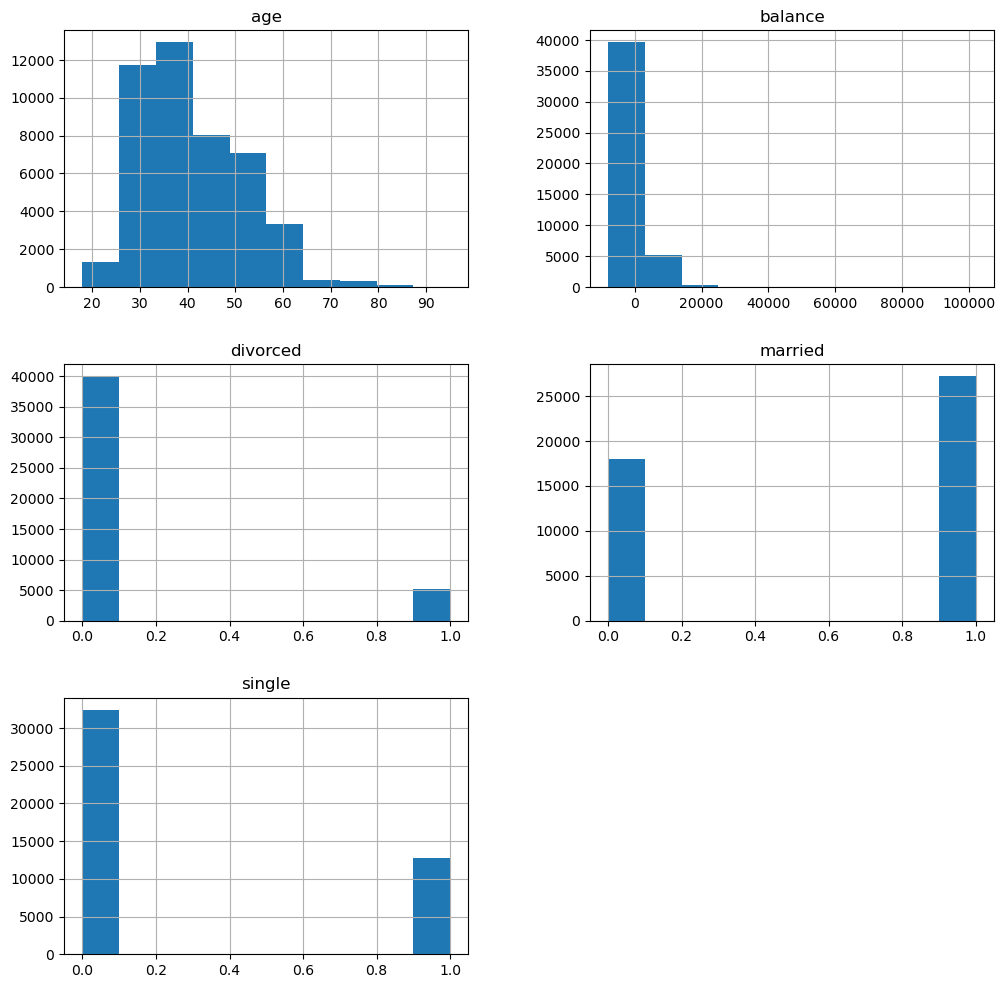

In [41]:
plt.rcParams['figure.figsize'] = (12,12)
viz = train_s[['age', 'balance', 'divorced', 'married', 'single']]
viz.hist()
plt.show()

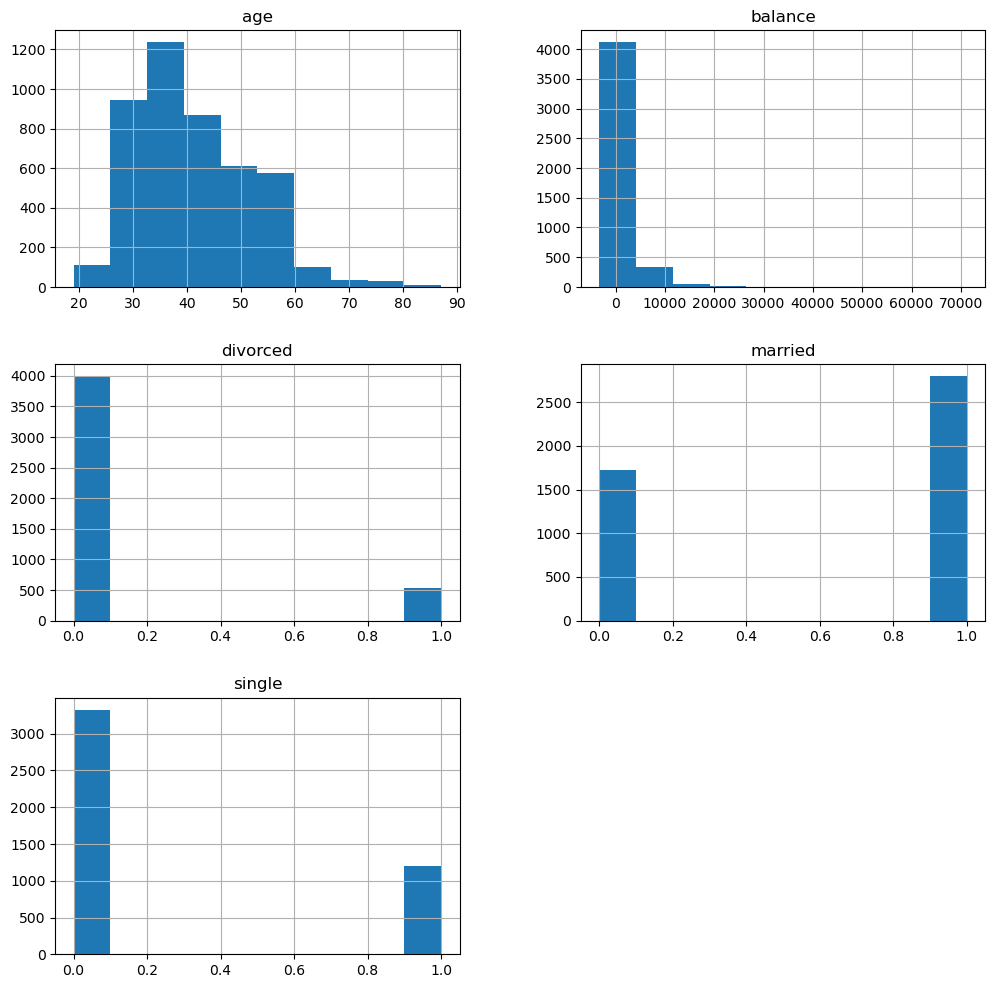

In [43]:
plt.rcParams['figure.figsize'] = (12,12)
viz = test_s[['age', 'balance', 'divorced', 'married', 'single']]
viz.hist()
plt.show()

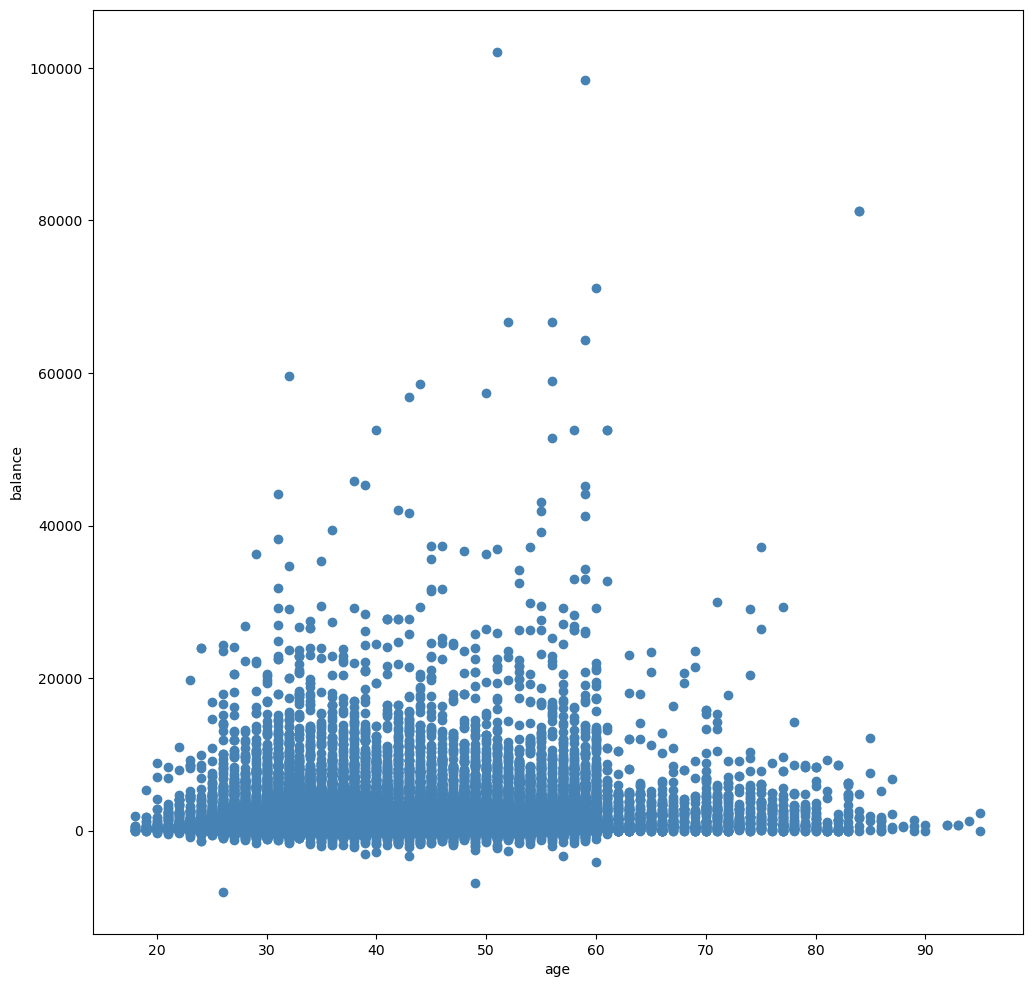

In [44]:
plt.scatter(train_s.age, train_s.balance, color="steelblue")
plt.xlabel("age")
plt.ylabel("balance")
plt.show()

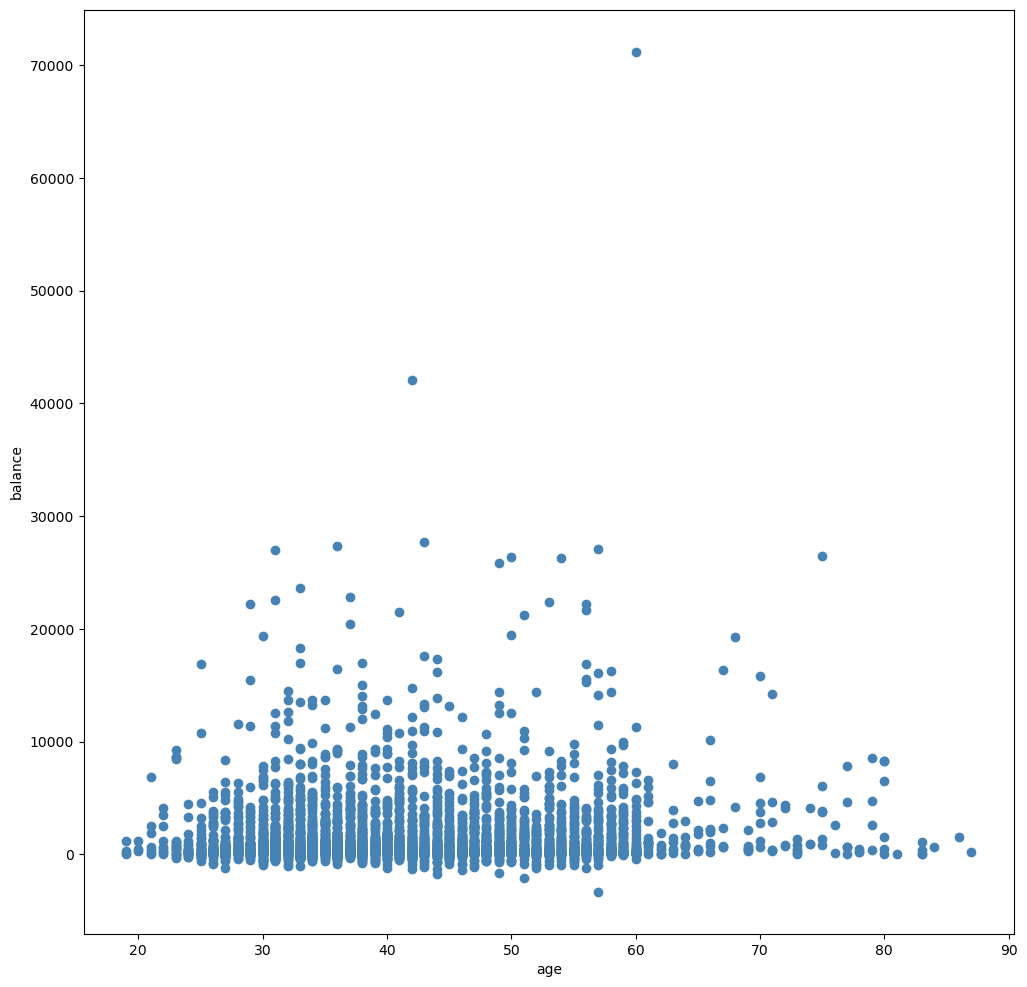

In [45]:
plt.scatter(test_s.age, test_s.balance, color="steelblue")
plt.xlabel("age")
plt.ylabel("balance")
plt.show()

In [46]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_s[['age']])
train_y = np.asanyarray(train_s[['balance']])

regr.fit(train_x, train_y)

LinearRegression()

In [47]:
print(regr.coef_)
print(regr.intercept_)

[[28.03768861]]
[214.51534285]


In [48]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test_s[['age']])
test_y = np.asanyarray(test_s[['balance']])
test_y_ = regr.predict(test_x)

In [49]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 1598.89
Residual sum of squares (MSE): 8997149.37
R2-score: 0.01


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [51]:
# İlgili özellikler seçilir
features = ['age', 'divorced', 'married', 'single']

In [52]:
mdf = pd.concat([train_s, test_s], ignore_index=True)

In [53]:
# Bağımlı ve bağımsız değişkenler tanımlanır
X = mdf[features]
y = mdf['balance']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
# Model oluşturulur ve eğitilir
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
# Tahmin yaptırılır
y_pred = model.predict(X_test)

In [57]:
# Model performansı değerlendirilir
print('Ortalama Mutlak Hata (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Ortalama Kare Hata (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Kök Ortalama Kare Hata (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % model.score(X, y)) # explained variance, best score is 1.0

Ortalama Mutlak Hata (MAE): 1532.6024044216113
Ortalama Kare Hata (MSE): 8598652.628305396
Kök Ortalama Kare Hata (RMSE): 2932.345925757293
Variance score: 0.01


In [58]:
# Katsayılar ve sabit (intercept) değerlere bakılır
coefficients = pd.DataFrame({'Katsayılar': model.coef_}, index=features)
intercept = model.intercept_
print('\nKatsayılar:\n', coefficients)
print('\nSabit (Intercept):', intercept)


Katsayılar:
           Katsayılar
age        34.807059
divorced -306.802513
married    51.837418
single    254.965096

Sabit (Intercept): -121.87153461244361
